In [1]:
%load_ext autoreload
%autoreload 2

import analyze_utils

In [2]:
all_dfs = {}
all_losses = {}
for ds in ['ffb', 'imdb', 'rt', 'sst2', 'tweets']:
    print(ds)
    save_dir = f'/home/johnmorris/interpretable-autoprompting/results/autoprompt_sentiment/{ds}'
    df, losses = analyze_utils.load_results_and_cache_autoprompt_json(save_dir, save_file='r.pkl', include_losses=True)
    all_dfs[ds] = df
    all_losses[ds] = losses

ffb


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 13.84it/s]


imdb


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  6.96it/s]


rt


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.46it/s]


sst2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  9.40it/s]


tweets


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 14.43it/s]


In [3]:
all_dfs['ffb'][all_dfs['ffb']['model_cls'] == 'autoprompt'][['prefixes', 'prefix_n_queries']]

,prefixes,prefix_n_queries
0,maybe Yesthe confined introducefineKeanswerwi...,2
1,maybe Yesthe confined introduce crucialKeansw...,2
2,maybe Yesthe confined introduceproducedKeansw...,2
3,maybe Yesthe confined introducepositiveKeansw...,2
4,maybe Yesthe confined introduce PrKeanswerwit...,2
...,...,...
123,Magic Nope McCorm Agility controversialQbable...,2
124,Magic Nope McCorm Agility controversialQbable...,2
125,Magic Nope McCorm Agility controversialQbable...,2
126,?:thethethethethethethethethethethethethethethe,2


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
full_df = pd.concat(all_dfs.values())

(
    full_df.groupby(['task_name', 'model_cls', 'seed']).first()[['prefixes', 'prefix_train_loss', 'prefix_train_acc',  'prefix_n_queries']]
        .to_pickle('../results/autoprompt_sentiment/prompts.pkl')
)

In [7]:
full_df.groupby(['task_name', 'model_cls', 'seed']).first()[['prefixes', 'prefix_train_loss', 'prefix_train_acc',  'prefix_n_queries']]

prefixes  \
task_name    model_cls  seed                                                      
ffb_train    autoprompt 1      questionable Nope McCorm Agility GuiltyQuable...   
                        2      Maybeiago EUR Vimaterasu estab dime blatorget...   
                        3     maybe Yesthe confined introducefineKeanswerwi...   
             genetic    1      Are the following statements true? Answer: Ma...   
                        2     . Answer: MaybeInput:. Answer: MaybeInput:. An...   
                        3      Budapest. Answer: Maybe (1) - The parent comp...   
imdb_train   autoprompt 1      traditionallyムRewPalest high Nowww神\n �/​ vid...   
                        2      Noamphetamine revealed oxidative Yes MDMA pok...   
                        3      hes noises soombat,'' RetrievedDespite No�� s...   
             genetic    1      Slow-paced movies starring the lead role of C...   
                        2      Noam Chomsky is, by definition, a genius, isn...   
                        3      Write a brief essay answering the prompt "Do ...   
rt_train     autoprompt 1     stroazon �HC predicate Cosmic bind?" NoDecl Ca...   
                        2     ecd Courtesy Feldman intuitive intuanguard inf...   
                        3      WinnFarm; does Shroud Pact"]=> NormalConstruc...   
             genetic    1      "a well acted and directed film." Answer: Yes...   
                        2      no, the movie is well-conceived and executed....   
                        3      no doubt this is a slow-paced film. Answer: Y...   
sst2_train   autoprompt 1     aterasuainment ===============================...   
                        2      Givenensional 255103Whetherarch instance Sand...   
             genetic    1      The story line was good. Answer: Yes - A.C. S...   
                        3      good idea, interesting twist, good story.  An...   
tweets_train autoprompt 1     )]. FAQ\n Does refusing Gameahead recon Bluepr...   
                        2      FAQ confusion frequently claims one permit Co...   
                        3     inkeravaritymeta Licenseader observer225 sprit...   
             genetic    1                    @user   Answer: No(4)   https://t.   
                        2      your day today Answer: No Reply: No Answer: N...   
                        3                    sad.wav, sad.mp3 Answer: No (0xFF,   

                              prefix_train_loss  prefix_train_acc  \
task_name    model_cls  seed                                        
ffb_train    autoprompt 1              2.178623          0.500000   
                        2              2.103834          0.812500   
                        3              1.170963          0.937500   
             genetic    1              1.143480          0.937500   
                        2              1.453786          0.750000   
                        3              1.027310          0.875000   
imdb_train   autoprompt 1              8.388127          0.083333   
                        2              6.394076          0.125000   
                        3              7.643039          0.125000   
             genetic    1              9.327049          0.250000   
                        2              9.540214          0.250000   
                        3             10.370430          0.187500   
rt_train     autoprompt 1              0.769902          0.875000   
                        2              0.952305          0.875000   
                        3              0.987308          0.937500   
             genetic    1              0.693669          1.000000   
                        2              0.720310          0.958333   
                        3              0.830908          0.875000   
sst2_train   autoprompt 1              0.650572          0.812500   
                        2              1.152049          0.875000   
             genetic    1              0.904843          0.937

In [8]:
from typing import List

sns.set_theme(style="white")

def _smooth(losses: List[float], n_window=1) -> List:
    if isinstance(losses, list): losses = pd.Series(losses)
    l_smooth = []
    for i in range(n_window, len(losses)-n_window):
        window = losses[i-n_window:i+n_window+1]
        l_smooth.append( sum(window) / len(window))

    return l_smooth


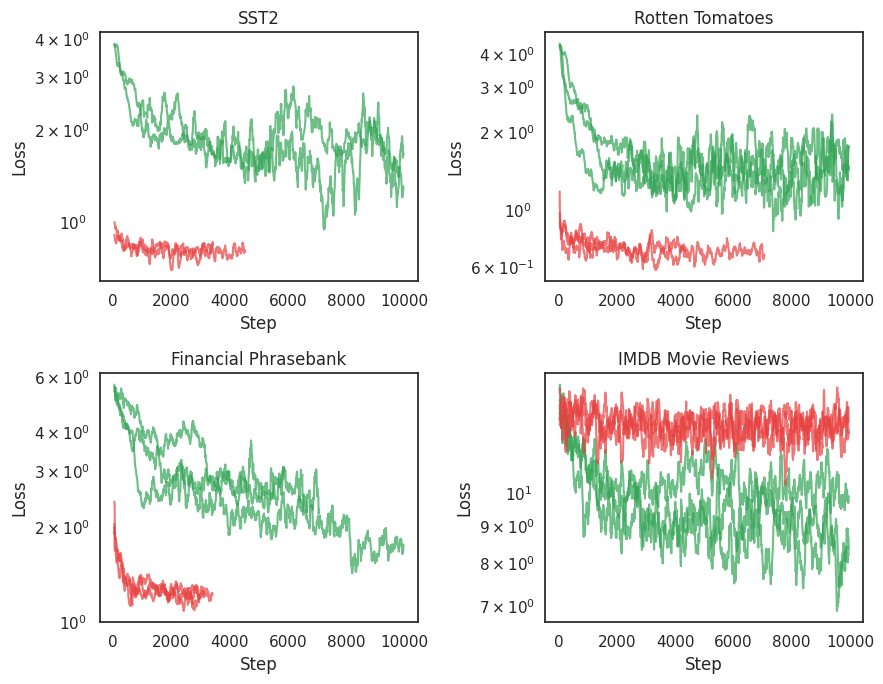

In [14]:
NICE_DATASET_NAMES = {
    'sst2': 'SST2',
    'rt': 'Rotten Tomatoes',
    'ffb': 'Financial Phrasebank',
    # 'tweets': 'Tweets',
    'imdb': 'IMDB Movie Reviews',
}

fig, ax_list = plt.subplots(nrows=2, figsize=(9, 7), ncols=2)# , sharex=True)
for i, dataset_name in enumerate(NICE_DATASET_NAMES.keys()):
    ax = ax_list[i//2][i%2]
    mini_df = all_dfs[dataset_name].groupby(['model_cls', 'seed']).first().reset_index()
    mini_df['legend'] = mini_df.apply(analyze_utils.get_legend__autoprompt, axis=1)
    mini_df['loss'] = all_losses[dataset_name]
    mini_df['step'] = mini_df.apply(lambda row: np.arange(len(row['loss'])) * row['batch_size'], axis=1)

    for i in range(len(mini_df)):
        _n=5
        y = _smooth(mini_df['loss'][i], _n)
        x = mini_df['step'][i][_n:-_n]
        color = analyze_utils.COLORS[mini_df.iloc[i]['legend']]
        sns.lineplot(x=x, y=y, linewidth=1.5, color=color, ax=ax, alpha=0.7)

    ax.set_xlabel('Step')
    ax.set_ylabel('Loss')
    ax.set_yscale('log') 
    ax.set_title(f'{NICE_DATASET_NAMES[dataset_name]}')

# fig.delaxes(ax_list[-1][-1]) # hide the last one
plt.tight_layout()
plt.savefig('../results/autoprompt_classification/loss_plots.pdf', bbox_inches='tight')